# Bayesian Learning

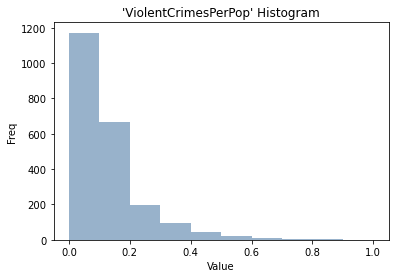

(1549, 100)
(665, 100)


In [64]:
%run alt_Preprocessing.ipynb

In [65]:
# Naive Bayes Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, cross_val_score

## Naive Bayes

In [66]:
# Load train and test sets from Preprocessing file
x_train = x_train
y_train = y_train
x_test = x_test
y_test = y_test

# Set classes based on classification complexity decided in pre-processing
classes = {'LowCrime': 0, 'HighCrime': 1}

# Function for plotting confusion matrix
def plot_confusion_matrix(train_pred, train, dom):
    cf = confusion_matrix(train_pred,train)
    sns.heatmap(cf,annot=True,yticklabels=classes,xticklabels=classes,cmap='Blues', fmt='g')
    plt.title(f'{dom} Confusion matrix')
    plt.tight_layout()
    plt.savefig(f'{dom} Confusion matrix.png')
    plt.show()


**Gaussian:** 81% accuracy

Parameters:
- priors: Prior probabilities of the classes. If specified the priors are not adjusted according to the data.
- var_smoothing: Portion of the largest variance of all features that is added to variances for calculation stability.

In [67]:
# Gaussian Naive Bayes
gnb_model = GaussianNB(priors=None, var_smoothing=1e-9)
gnb_model.fit(x_train, y_train)

GaussianNB()

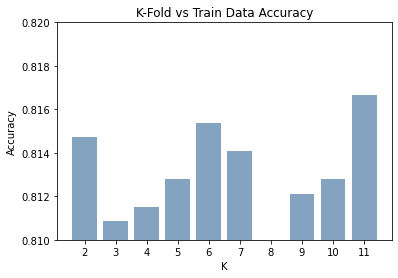

In [68]:
# Perform k-fold validation on training data
kf =KFold(n_splits=10, shuffle=True, random_state=42)
kfold_scores = {}
for i in range(2,12):
    kf =KFold(n_splits=i, shuffle=True, random_state=42)
    score = cross_val_score(gnb_model, x_train, y_train, cv= kf, scoring="accuracy")
    res = {str(i): score.mean()}
    kfold_scores.update(res)

for key in kfold_scores:
    plt.bar([key], kfold_scores[key], label=key, color=(0.2, 0.4, 0.6, 0.6))

plt.title('K-Fold vs Train Data Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.ylim(0.81, 0.82)
plt.show()

In [69]:
# Check k-fold validation
kf =KFold(n_splits=10, shuffle=True, random_state=42)
score = cross_val_score(gnb_model, x_train, y_train, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')
print(f'Standard Deviation in score: {"{:.2f}".format(score.std())}')

Scores for each fold are: [0.8516129  0.73548387 0.81290323 0.87096774 0.83870968 0.78709677
 0.76129032 0.84516129 0.81290323 0.81168831]
Average score: 0.81
Standard Deviation in score: 0.04


In [70]:
# Compare train &  test data
y_train_pred = gnb_model.predict(x_train)
y_test_pred = gnb_model.predict(x_test)

print(f'Gaussian Naive Bayes Train Model Accuracy(in %): {metrics.accuracy_score(y_train_pred,y_train)*100}')
print(f'Gaussian Naive Bayes Test Model Accuracy(in %): {metrics.accuracy_score(y_test_pred,y_test)*100}')

Gaussian Naive Bayes Train Model Accuracy(in %): 81.6010329244674
Gaussian Naive Bayes Test Model Accuracy(in %): 85.71428571428571


**Multinomial:** 81% accuracy

Parameters:
- alpha: Additive (Laplace/Lidstone) smoothing parameter (0 for no smoothing).
- fit_prior: Whether to learn class prior probabilities or not. If false, a uniform prior will be used.
- class_prior: Prior probabilities of the classes. If specified the priors are not adjusted according to the data.

In [71]:
# Multinomial Naive Bayes
m_model = MultinomialNB(alpha=1, class_prior=None, fit_prior=True)
m_model.fit(x_train, y_train)

MultinomialNB(alpha=1)

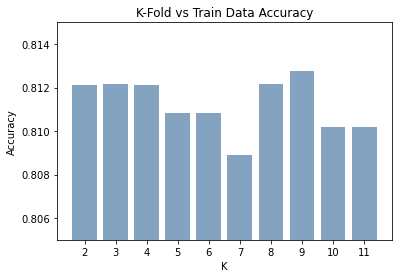

In [72]:
# Perform k-fold validation on training data
kf =KFold(n_splits=10, shuffle=True, random_state=42)
kfold_scores = {}
for i in range(2,12):
    kf =KFold(n_splits=i, shuffle=True, random_state=42)
    score = cross_val_score(m_model, x_train, y_train, cv= kf, scoring="accuracy")
    res = {str(i): score.mean()}
    kfold_scores.update(res)

for key in kfold_scores:
    plt.bar([key], kfold_scores[key], label=key, color=(0.2, 0.4, 0.6, 0.6))

plt.title('K-Fold vs Train Data Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.ylim(0.805, 0.815)
plt.show()

In [73]:
# Check k-fold split
kf =KFold(n_splits=9, shuffle=True, random_state=42)
score = cross_val_score(m_model, x_train, y_train, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')
print(f'Standard Deviation in score: {"{:.2f}".format(score.std())}')

Scores for each fold are: [0.85549133 0.77325581 0.76744186 0.87209302 0.80813953 0.77325581
 0.81395349 0.84883721 0.80232558]
Average score: 0.81
Standard Deviation in score: 0.04


In [74]:
# Compare train &  test data
y_train_pred = m_model.predict(x_train)
y_test_pred = m_model.predict(x_test)

print(f'Multinomial Naive Bayes Train Model Accuracy(in %): {metrics.accuracy_score(y_train_pred,y_train)*100}')
print(f'Multinomial Naive Bayes Test Model Accuracy(in %): {metrics.accuracy_score(y_test_pred,y_test)*100}')

Multinomial Naive Bayes Train Model Accuracy(in %): 81.40735958683021
Multinomial Naive Bayes Test Model Accuracy(in %): 86.01503759398497


**Bernoulli:** 83% accuracy

Parameters:
- alpha: Additive (Laplace/Lidstone) smoothing parameter (0 for no smoothing).
- binarize: Threshold for binarizing (mapping to booleans) of sample features. If None, input is presumed to already consist of binary vectors.
- fit_prior: Whether to learn class prior probabilities or not. If false, a uniform prior will be used.
- class_prior: Prior probabilities of the classes. If specified the priors are not adjusted according to the data.

In [75]:
# Bernoulli Naive Bayes
b_model = BernoulliNB(alpha=1, binarize=None, fit_prior=True, class_prior=None)
b_model.fit(x_train, y_train)

BernoulliNB(alpha=1, binarize=None)

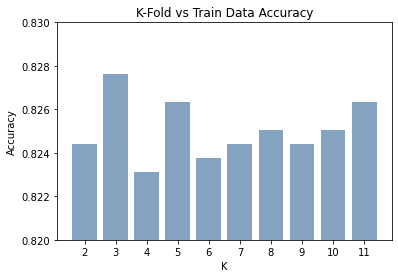

In [76]:
# Perform k-fold validation on training data
kf =KFold(n_splits=10, shuffle=True, random_state=42)
kfold_scores = {}
for i in range(2,12):
    kf =KFold(n_splits=i, shuffle=True, random_state=42)
    score = cross_val_score(b_model, x_train, y_train, cv= kf, scoring="accuracy")
    res = {str(i): score.mean()}
    kfold_scores.update(res)

for key in kfold_scores:
    plt.bar([key], kfold_scores[key], label=key, color=(0.2, 0.4, 0.6, 0.6))

plt.title('K-Fold vs Train Data Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.ylim(0.82, 0.83)
plt.savefig('k_fold.png')
plt.show()

In [77]:
# Check k-fold split
kf =KFold(n_splits=3, shuffle=True, random_state=42)
score = cross_val_score(b_model, x_train, y_train, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score(in %): {"{:.2f}".format(score.mean()*100)}')
print(f'Standard Deviation in score: {"{:.2f}".format(score.std())}')

Scores for each fold are: [0.81237911 0.83527132 0.83527132]
Average score(in %): 82.76
Standard Deviation in score: 0.01


Bernoulli Naive Bayes Train Model Accuracy(in %): 82.63395739186572
Bernoulli Naive Bayes Test Model Accuracy(in %): 86.61654135338345


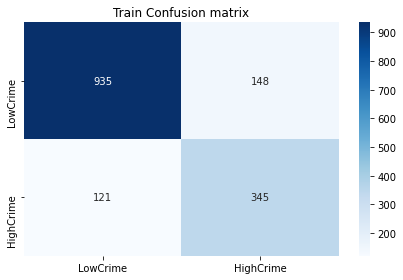

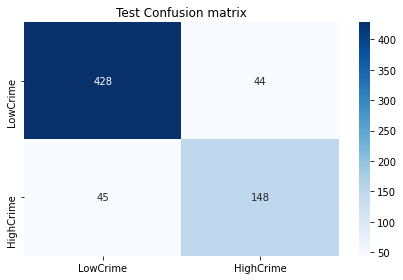

In [78]:
# Compare train & test data
y_train_pred = b_model.predict(x_train)
y_test_pred = b_model.predict(x_test)

print(f'Bernoulli Naive Bayes Train Model Accuracy(in %): {metrics.accuracy_score(y_train_pred,y_train)*100}')
print(f'Bernoulli Naive Bayes Test Model Accuracy(in %): {metrics.accuracy_score(y_test_pred,y_test)*100}')
plot_confusion_matrix(y_train_pred,y_train,dom='Train')
plot_confusion_matrix(y_test_pred,y_test,dom='Test')